# Analysis of Bridge Strength and Betweenness (Study 2)
*Dataframes sourced from R*

# The Network Obtained from R
![image](R_Networks.png)

Predefined communities based on pyschological measures (CFS, BDI, LSAS)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('bridge_T1.csv')
df2 = pd.read_csv('bridge_T2.csv')
df3 = pd.read_csv('bridge_T3.csv')
df_ols= pd.read_csv('bridge_OLS.csv')

# Add a time point column to each dataframe
df1['Time'] = 'T1'
df2['Time'] = 'T2'
df3['Time'] = 'T3'

# Combine the dataframes
df_combined = pd.concat([df1, df2, df3])

# Reset the index
df_combined.reset_index(drop=True, inplace=True)

# Download combined data to a new CSV file
df_combined.to_csv('bridge_combined.csv', index=False)

## Summary

In [16]:

# File paths
file_paths = {
    "T1": "bridge_T1.csv",
    "T2": "bridge_T2.csv",
    "T3": "bridge_T3.csv"
}

# Load the data
dataframes = {key: pd.read_csv(path) for key, path in file_paths.items()}

# Display basic information about each dataset
summary = {key: df.describe(include="all") for key, df in dataframes.items()}
summary

{'T1':          Node  Bridge_Strength  Bridge_Betweenness
 count      56        56.000000           56.000000
 unique     56              NaN                 NaN
 top     BDI_1              NaN                 NaN
 freq        1              NaN                 NaN
 mean      NaN         0.096497           43.392857
 std       NaN         0.091802           49.523063
 min       NaN         0.000000            0.000000
 25%       NaN         0.031840            9.750000
 50%       NaN         0.070475           29.500000
 75%       NaN         0.130592           56.500000
 max       NaN         0.482709          264.000000,
 'T2':          Node  Bridge_Strength  Bridge_Betweenness
 count      56        56.000000           56.000000
 unique     56              NaN                 NaN
 top     BDI_1              NaN                 NaN
 freq        1              NaN                 NaN
 mean      NaN         0.095133           49.392857
 std       NaN         0.079223           56.115685

#### Bridge Strength (Mean ± SD):

T1: 0.096 ± 0.092, Range: [0.000, 0.483]

T2: 0.095 ± 0.079, Range: [0.000, 0.464]

T3: 0.102 ± 0.074, Range: [0.000, 0.436]

#### Bridge Betweenness (Mean ± SD):

T1: 43.39 ± 49.52, Range: [0, 264]

T2: 49.39 ± 56.12, Range: [0, 193]

T3: 46.41 ± 45.09, Range: [0, 219]

#### Distribution:
The mean bridge strength remains relatively stable over time, slightly increasing at T3. Betweenness shows fluctuations, peaking at T2.


---

## Correlation

In [17]:
# Compute correlations between Bridge Strength and Bridge Betweenness for each time point
correlations = {key: df[["Bridge_Strength", "Bridge_Betweenness"]].corr() for key, df in dataframes.items()}
correlations

{'T1':                     Bridge_Strength  Bridge_Betweenness
 Bridge_Strength            1.000000            0.717736
 Bridge_Betweenness         0.717736            1.000000,
 'T2':                     Bridge_Strength  Bridge_Betweenness
 Bridge_Strength            1.000000            0.584863
 Bridge_Betweenness         0.584863            1.000000,
 'T3':                     Bridge_Strength  Bridge_Betweenness
 Bridge_Strength             1.00000             0.49945
 Bridge_Betweenness          0.49945             1.00000}


---

## Top 5 Bridge Nodes

In [18]:
# Identify top bridging nodes at each time point
top_bridge_nodes = {}
for key, df in dataframes.items():
    top_strength = df.nlargest(5, "Bridge_Strength")[["Node", "Bridge_Strength"]]
    top_betweenness = df.nlargest(5, "Bridge_Betweenness")[["Node", "Bridge_Betweenness"]]
    top_bridge_nodes[key] = {"Top Strength": top_strength, "Top Betweenness": top_betweenness}

top_bridge_nodes


{'T1': {'Top Strength':         Node  Bridge_Strength
  21   CFS_2_R         0.482709
  22   CFS_3_R         0.366145
  31    CFS_12         0.286644
  29  CFS_10_R         0.282683
  12    BDI_13         0.198360,
  'Top Betweenness':        Node  Bridge_Betweenness
  31   CFS_12                 264
  21  CFS_2_R                 200
  48  LSAS_17                 139
  20    CFS_1                 104
  26    CFS_7                 103},
 'T2': {'Top Strength':        Node  Bridge_Strength
  31   CFS_12         0.463585
  21  CFS_2_R         0.320623
  22  CFS_3_R         0.291298
  24  CFS_5_R         0.176567
  46  LSAS_15         0.166623,
  'Top Betweenness':        Node  Bridge_Betweenness
  31   CFS_12                 193
  18   BDI_19                 187
  22  CFS_3_R                 179
  52  LSAS_21                 176
  54  LSAS_23                 174},
 'T3': {'Top Strength':         Node  Bridge_Strength
  21   CFS_2_R         0.435936
  22   CFS_3_R         0.268415
  31    

## Top Bridge Nodes

In [19]:
df = df_combined

# Identify the top bridging nodes at each time point based on Bridge Strength and Bridge Betweenness
top_bridge_strength = df.loc[df.groupby("Time")["Bridge_Strength"].idxmax(), ["Time", "Node", "Bridge_Strength"]]
top_bridge_betweenness = df.loc[df.groupby("Time")["Bridge_Betweenness"].idxmax(), ["Time", "Node", "Bridge_Betweenness"]]

# Merge results for a comprehensive view
top_bridges = pd.merge(top_bridge_strength, top_bridge_betweenness, on="Time", suffixes=("_Strength", "_Betweenness"))

# Display top bridging nodes per time point
display(top_bridges)

,Time,Node_Strength,Bridge_Strength,Node_Betweenness,Bridge_Betweenness
0,T1,CFS_2_R,0.482709,CFS_12,264
1,T2,CFS_12,0.463585,CFS_12,193
2,T3,CFS_2_R,0.435936,CFS_3_R,219


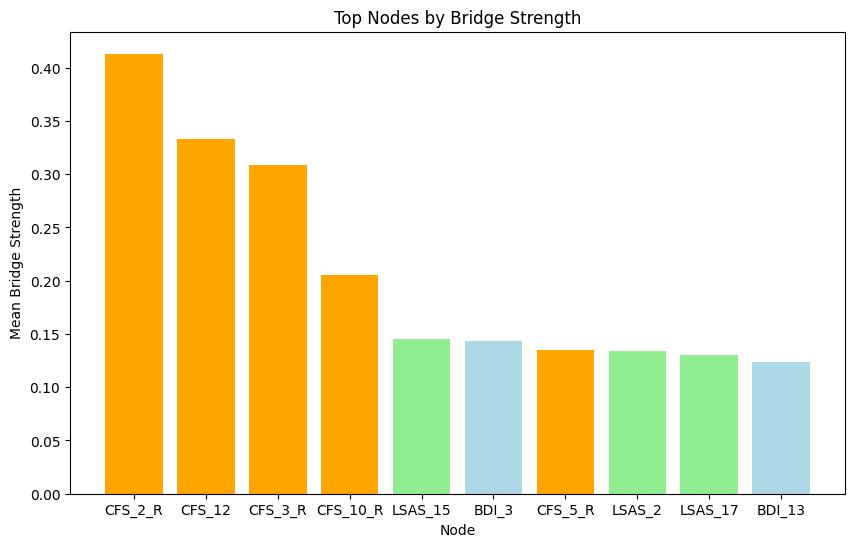

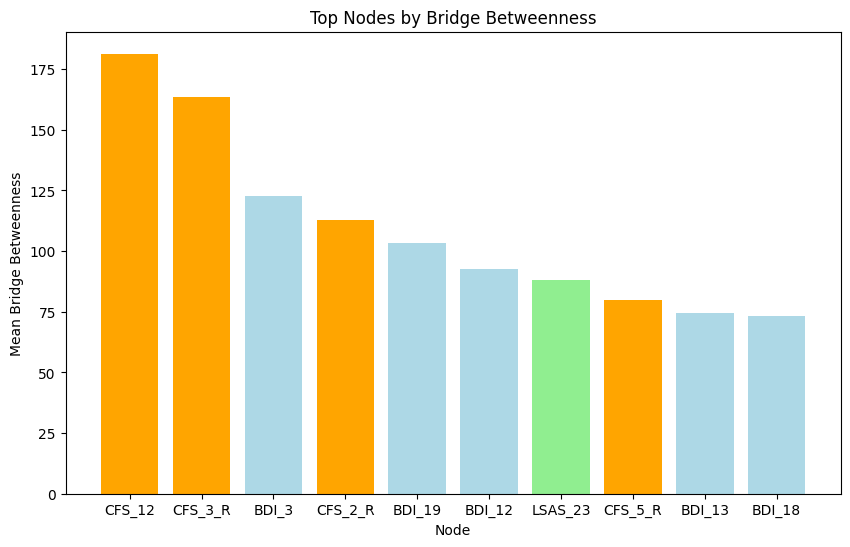

In [20]:
# Color code nodes based on test
# CFS is orange, LSAS is light green, BDI is light blue
# Define the color mapping

# Rank nodes by bridge strength score (aggregated over all three time points)
df_strength = df_combined.groupby('Node')['Bridge_Strength'].mean().sort_values(ascending=False).reset_index().head(10)

# Map colors based on the scale (CFS, LSAS, BDI), and fill NaN values with a default color
color_mapping = {'LSA': 'lightgreen', 'CFS': 'orange', 'BDI': 'lightblue'}
df_strength['Color'] = df_strength['Node'].str[:3].map(color_mapping).fillna('gray')

# Visualize the bridge strength scores
plt.figure(figsize=(10, 6))
plt.bar(df_strength['Node'], df_strength['Bridge_Strength'], color=df_strength['Color'])
plt.xlabel('Node')
plt.ylabel('Mean Bridge Strength')
plt.title('Top Nodes by Bridge Strength')
plt.xticks(rotation=0)
plt.show()

# Rank nodes by bridge betweenness score (aggregated over all three time points)
df_betweenness = df_combined.groupby('Node')['Bridge_Betweenness'].mean().sort_values(ascending=False).reset_index().head(10)

# Map colors based on the scale (CFS, LSAS, BDI), and fill NaN values with a default color
df_betweenness['Color'] = df_betweenness['Node'].str[:3].map(color_mapping).fillna('gray')

# Visualize the bridge betweenness scores
plt.figure(figsize=(10, 6))
plt.bar(df_betweenness['Node'], df_betweenness['Bridge_Betweenness'], color=df_betweenness['Color'])
plt.xlabel('Node')
plt.ylabel('Mean Bridge Betweenness')
plt.title('Top Nodes by Bridge Betweenness')
plt.xticks(rotation=0)
plt.show()



---

## T3 - T1 Analysis

In [21]:

# Now drop the time column
df1.drop('Time', axis=1, inplace=True)
df2.drop('Time', axis=1, inplace=True)
df3.drop('Time', axis=1, inplace=True)

# Analyze how the bridge has changed over time (T3 minus T1)
# Subtract the T1 dataframe from the T3 dataframe, aligning on the node column
df_diff = df3.set_index('Node').sub(df1.set_index('Node')).dropna().reset_index()

# Extract the first three characters of the row item in the Node column to get the scale
df_diff['Scale'] = df_diff['Node'].str[:3]

# Get the mean and standard deviation of the bridge measures for each scale in df_diff
df_bdi = df_diff[df_diff['Scale'] == 'BDI']
df_lsas = df_diff[df_diff['Scale'] == 'LSA']
df_cfs = df_diff[df_diff['Scale'] == 'CFS']

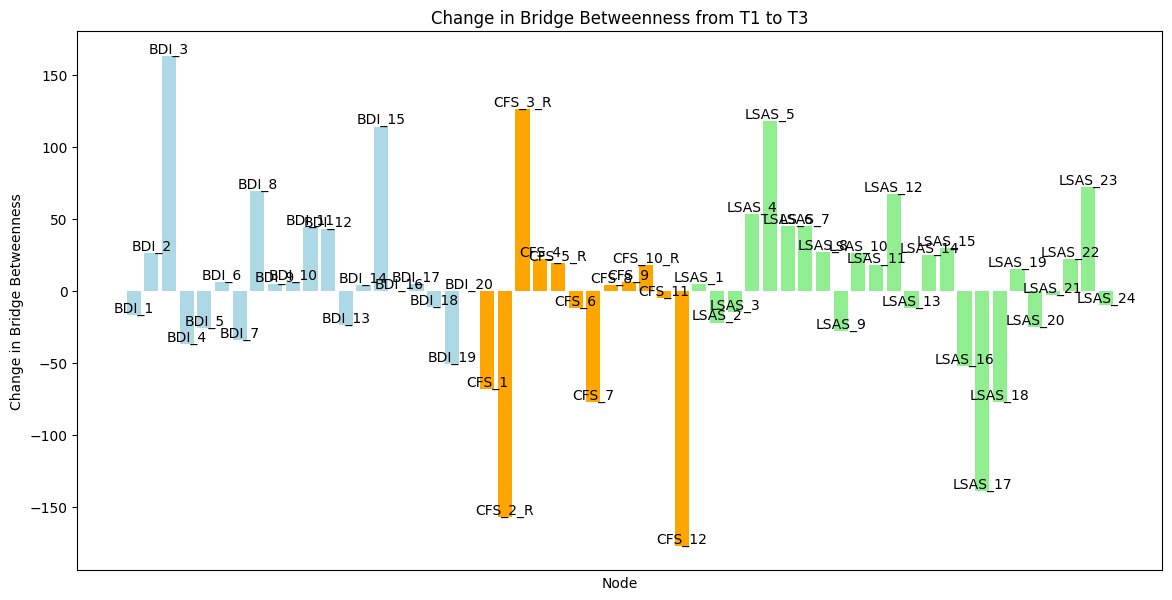

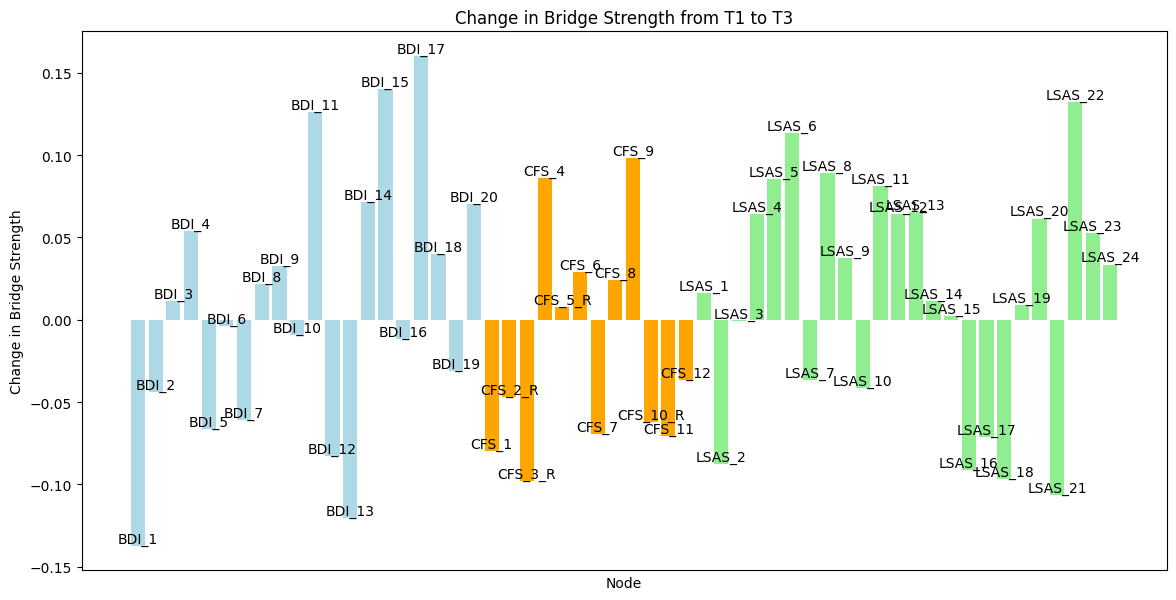

In [22]:
import matplotlib.pyplot as plt

# Define the color mapping
color_mapping = {'LSA': 'lightgreen', 'CFS': 'orange', 'BDI': 'lightblue'}
colors = df_diff['Scale'].map(color_mapping)

# Plot the change in bridge betweenness
plt.figure(figsize=(14, 7))
bars = plt.bar(df_diff['Node'], df_diff['Bridge_Betweenness'], color=colors)
plt.xlabel('Node')
plt.ylabel('Change in Bridge Betweenness')
plt.title('Change in Bridge Betweenness from T1 to T3')
plt.xticks([])  # Remove x-axis labels

# Annotate bars with node names
for bar, node in zip(bars, df_diff['Node']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, node, ha='center', va='bottom', rotation=0)

plt.show()

# Plot the change in bridge strength
plt.figure(figsize=(14, 7))
bars = plt.bar(df_diff['Node'], df_diff['Bridge_Strength'], color=colors)
plt.xlabel('Node')
plt.ylabel('Change in Bridge Strength')
plt.title('Change in Bridge Strength from T1 to T3')
plt.xticks([])  # Remove x-axis labels

# Annotate bars with node names
for bar, node in zip(bars, df_diff['Node']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, node, ha='center', va='bottom', rotation=0)

plt.show()

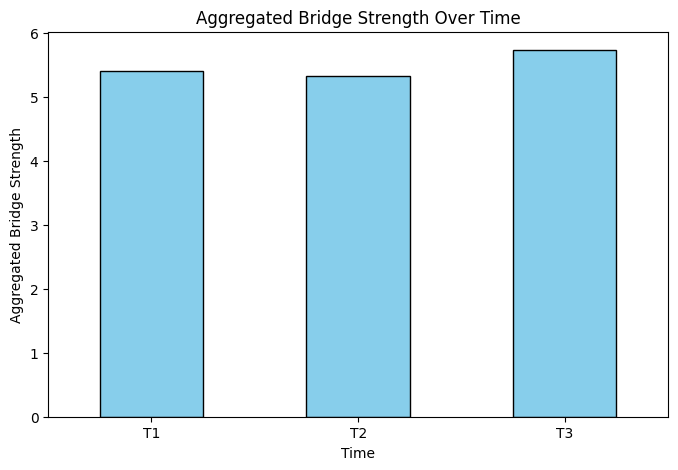

In [23]:
# Aggregate bridge strength over time
bridge_strength_agg = df_combined.groupby('Time')['Bridge_Strength'].sum()

# Plot the aggregated bridge strength
plt.figure(figsize=(8, 5))
bridge_strength_agg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Time')
plt.ylabel('Aggregated Bridge Strength')
plt.title('Aggregated Bridge Strength Over Time')
plt.xticks(rotation=0)
plt.show()

# The big analysis, with everything

C:\Users\MadiL\AppData\Local\Temp\ipykernel_9980\4042849748.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot(strength_values, labels=["T1", "T2", "T3", "OLS"])
C:\Users\MadiL\AppData\Local\Temp\ipykernel_9980\4042849748.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot(bridge_strength_values, labels=["T1", "T2", "T3", "OLS"])
C:\Users\MadiL\AppData\Local\Temp\ipykernel_9980\4042849748.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[2].boxplot(bridge_betweenness_values, labels=["T1", "T2", "T3", "OLS"])


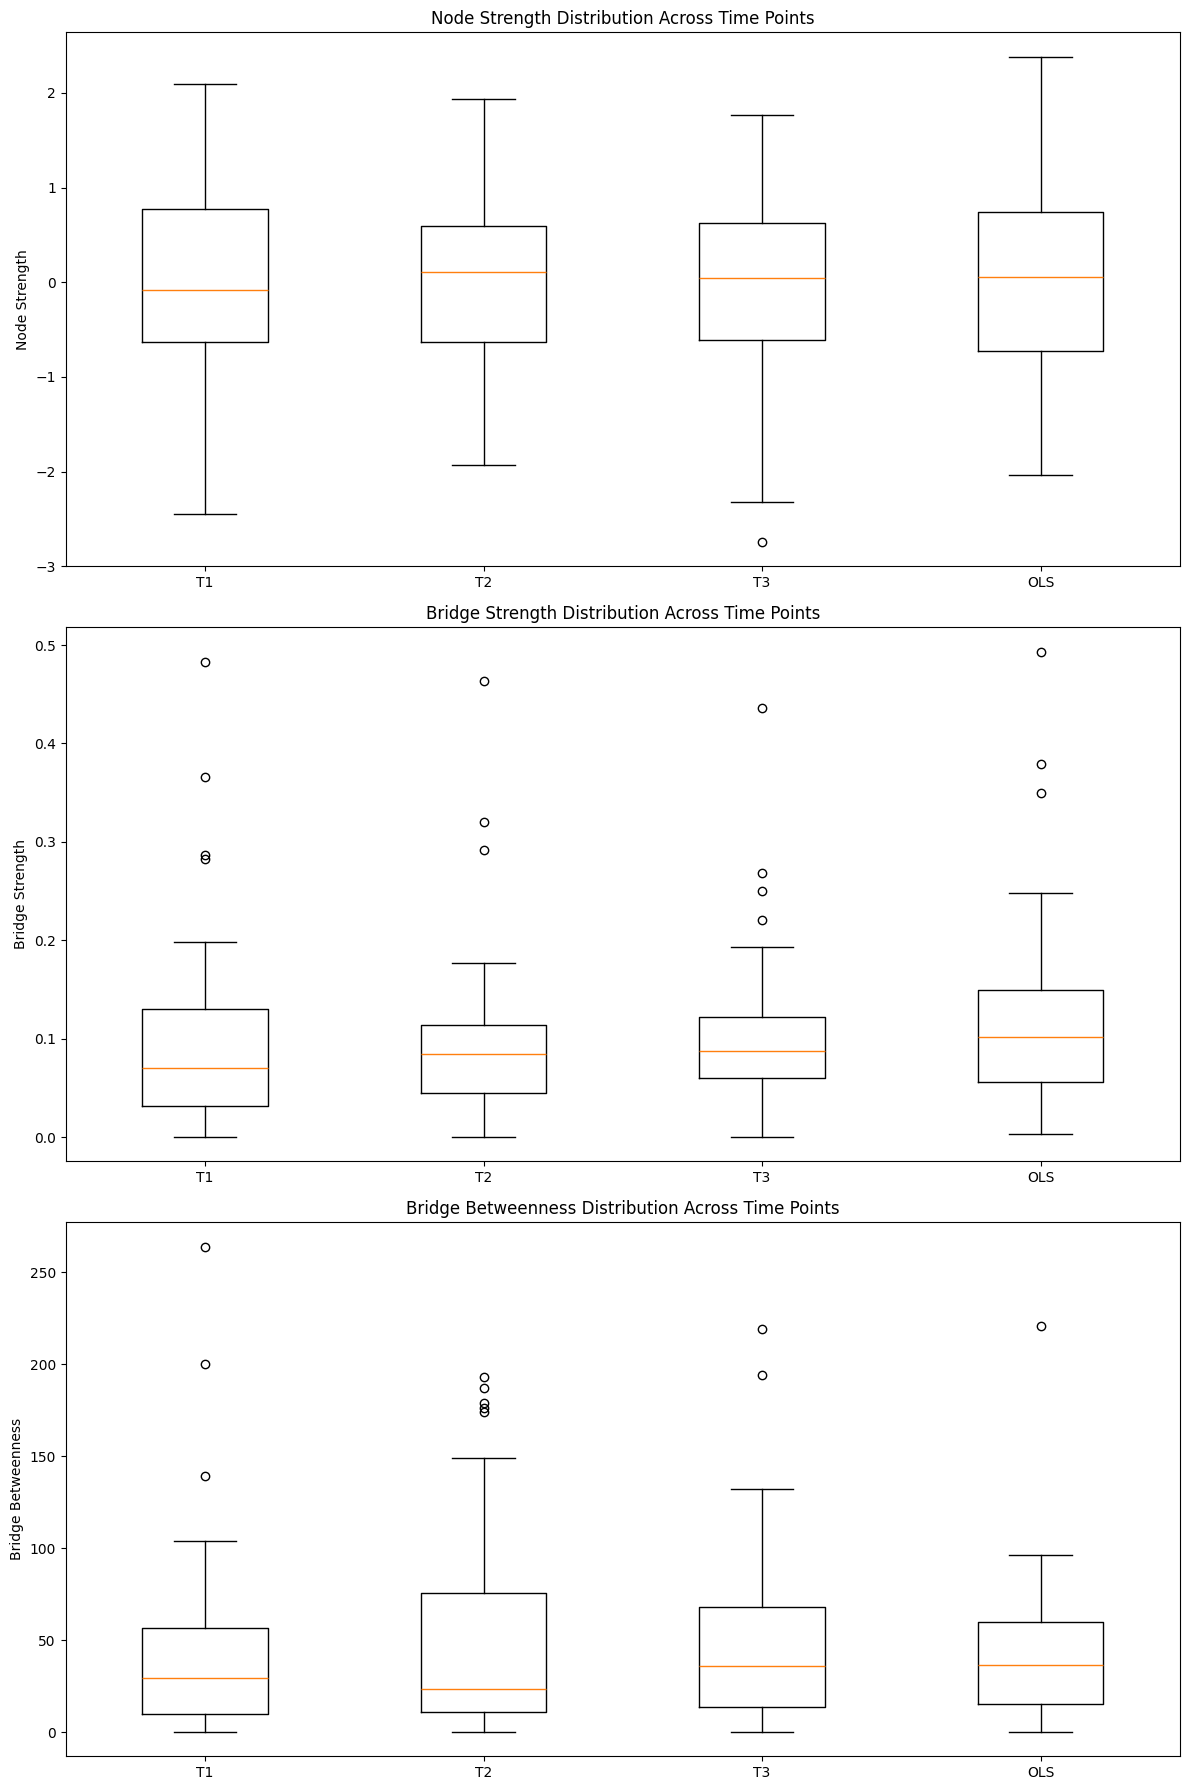

Summary Statistics for T1:
	Node Strength:
		Mean: -1.586032892321652e-17
		Std: 1.0000000000000002
		Min: -2.4450102197195
		25%: -0.6286572555186261
		50% (Median): -0.08068474716193991
		75%: 0.7691240918892283
		Max: 2.09825962408973
	Bridge Strength:
		Mean: 0.09649735263378545
		Std: 0.09180216110999138
		Min: 0.0
		25%: 0.031839840344767376
		50% (Median): 0.07047452625362505
		75%: 0.13059172289440152
		Max: 0.482708644502526
	Bridge Betweenness:
		Mean: 43.392857142857146
		Std: 49.52306297306101
		Min: 0.0
		25%: 9.75
		50% (Median): 29.5
		75%: 56.5
		Max: 264.0


Summary Statistics for T2:
	Node Strength:
		Mean: -4.758098676964956e-16
		Std: 1.0
		Min: -1.93358330723937
		25%: -0.6322407088544848
		50% (Median): 0.108997053291544
		75%: 0.5952411242554327
		Max: 1.94061509070024
	Bridge Strength:
		Mean: 0.09513304494320833
		Std: 0.07922277451520025
		Min: 0.0
		25%: 0.04496726259847943
		50% (Median): 0.0841749446899574
		75%: 0.1136373444802215
		Max: 0.463584789591947


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for the uploaded CSV files
file_paths = {
    "bridge_T1": "bridge_T1.csv",
    "bridge_T2": "bridge_T2.csv",
    "bridge_T3": "bridge_T3.csv",
    "bridge_OLS": "bridge_OLS.csv",
    "strength_T1": "strength_T1.csv",
    "strength_T2": "strength_T2.csv",
    "strength_T3": "strength_T3.csv",
    "strength_OLS": "strength_OLS.csv",
}


# Load the CSV files into dataframes
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Prepare summary statistics for each time point and OLS network
summary_stats = {}

# Calculate descriptive statistics for node strength, bridge strength, and bridge betweenness at each time point
for time_point in ["T1", "T2", "T3", "OLS"]:
    strength_stats = dataframes[f"strength_{time_point}"]["value"].describe()
    bridge_stats = dataframes[f"bridge_{time_point}"][["Bridge_Strength", "Bridge_Betweenness"]].describe()
    
    # Store the statistics in a structured way
    summary_stats[time_point] = {
        "Node Strength": {
            "Mean": strength_stats["mean"],
            "Std": strength_stats["std"],
            "Min": strength_stats["min"],
            "25%": strength_stats["25%"],
            "50% (Median)": strength_stats["50%"],
            "75%": strength_stats["75%"],
            "Max": strength_stats["max"],
        },
        "Bridge Strength": {
            "Mean": bridge_stats.loc["mean", "Bridge_Strength"],
            "Std": bridge_stats.loc["std", "Bridge_Strength"],
            "Min": bridge_stats.loc["min", "Bridge_Strength"],
            "25%": bridge_stats.loc["25%", "Bridge_Strength"],
            "50% (Median)": bridge_stats.loc["50%", "Bridge_Strength"],
            "75%": bridge_stats.loc["75%", "Bridge_Strength"],
            "Max": bridge_stats.loc["max", "Bridge_Strength"],
        },
        "Bridge Betweenness": {
            "Mean": bridge_stats.loc["mean", "Bridge_Betweenness"],
            "Std": bridge_stats.loc["std", "Bridge_Betweenness"],
            "Min": bridge_stats.loc["min", "Bridge_Betweenness"],
            "25%": bridge_stats.loc["25%", "Bridge_Betweenness"],
            "50% (Median)": bridge_stats.loc["50%", "Bridge_Betweenness"],
            "75%": bridge_stats.loc["75%", "Bridge_Betweenness"],
            "Max": bridge_stats.loc["max", "Bridge_Betweenness"],
        }
    }

# Plot box-and-whisker plots for each metric across time points
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Node Strength Boxplot
strength_values = [dataframes[f"strength_{tp}"]["value"] for tp in ["T1", "T2", "T3", "OLS"]]
axs[0].boxplot(strength_values, labels=["T1", "T2", "T3", "OLS"])
axs[0].set_title("Node Strength Distribution Across Time Points")
axs[0].set_ylabel("Node Strength")

# Bridge Strength Boxplot
bridge_strength_values = [dataframes[f"bridge_{tp}"]["Bridge_Strength"] for tp in ["T1", "T2", "T3", "OLS"]]
axs[1].boxplot(bridge_strength_values, labels=["T1", "T2", "T3", "OLS"])
axs[1].set_title("Bridge Strength Distribution Across Time Points")
axs[1].set_ylabel("Bridge Strength")

# Bridge Betweenness Boxplot
bridge_betweenness_values = [dataframes[f"bridge_{tp}"]["Bridge_Betweenness"] for tp in ["T1", "T2", "T3", "OLS"]]
axs[2].boxplot(bridge_betweenness_values, labels=["T1", "T2", "T3", "OLS"])
axs[2].set_title("Bridge Betweenness Distribution Across Time Points")
axs[2].set_ylabel("Bridge Betweenness")

plt.tight_layout()
plt.show()

# Print summary statistics in an easy-to-read format
for time_point, stats in summary_stats.items():
    print(f"Summary Statistics for {time_point}:")
    for metric, values in stats.items():
        print(f"\t{metric}:")
        for stat, value in values.items():
            print(f"\t\t{stat}: {value}")
    print("\n")



### Summary Statistics for T1:

	Node Strength:
		Mean: -1.586032892321652e-17
		Std: 1.0000000000000002
		Min: -2.4450102197195
		25%: -0.6286572555186261
		50% (Median): -0.08068474716193991
		75%: 0.7691240918892283
		Max: 2.09825962408973
	Bridge Strength:
		Mean: 0.09649735263378545
		Std: 0.09180216110999138
		Min: 0.0
		25%: 0.031839840344767376
		50% (Median): 0.07047452625362505
		75%: 0.13059172289440152
		Max: 0.482708644502526
	Bridge Betweenness:
		Mean: 43.392857142857146
		Std: 49.52306297306101
		Min: 0.0
		25%: 9.75
		50% (Median): 29.5
		75%: 56.5
		Max: 264.0


### Summary Statistics for T2:

	Node Strength:
		Mean: -4.758098676964956e-16
		Std: 1.0
		Min: -1.93358330723937
		25%: -0.6322407088544848
		50% (Median): 0.108997053291544
		75%: 0.5952411242554327
		Max: 1.94061509070024
	Bridge Strength:
		Mean: 0.09513304494320833
		Std: 0.07922277451520025
		Min: 0.0
		25%: 0.04496726259847943
		50% (Median): 0.0841749446899574
		75%: 0.1136373444802215
		Max: 0.463584789591947
	Bridge Betweenness:
		Mean: 49.392857142857146
		Std: 56.11568523924599
		Min: 0.0
		25%: 11.0
		50% (Median): 23.5
		75%: 75.5
		Max: 193.0


### Summary Statistics for T3:

	Node Strength:
		Mean: -1.6653345369377348e-16
		Std: 0.9999999999999998
		Min: -2.74409464148475
		25%: -0.607369531647993
		50% (Median): 0.045382979060973154
		75%: 0.6264889550719933
		Max: 1.7657451154694
	Bridge Strength:
		Mean: 0.10239648398510294
		Std: 0.07367146748845735
		Min: 0.0
		25%: 0.060053050882348274
		50% (Median): 0.08746445809361925
		75%: 0.12196611713725725
		Max: 0.435936141330133
	Bridge Betweenness:
		Mean: 46.410714285714285
		Std: 45.09012259735114
		Min: 0.0
		25%: 13.75
		50% (Median): 36.0
		75%: 67.75
		Max: 219.0


### Summary Statistics for OLS:
	Node Strength:
		Mean: -3.172065784643304e-17
		Std: 1.0000000000000004
		Min: -2.03804133756876
		25%: -0.7263028958564878
		50% (Median): 0.0596042937491384
		75%: 0.741887706599001
		Max: 2.38448604349927
	Bridge Strength:
		Mean: 0.11949716107101097
		Std: 0.09299925357198269
		Min: 0.0033592620396207
		25%: 0.055461940229247206
		50% (Median): 0.1019791189340475
		75%: 0.1498510155278705
		Max: 0.493333197425153
	Bridge Betweenness:
		Mean: 42.214285714285715
		Std: 37.7222935221525
		Min: 0.0
		25%: 15.5
		50% (Median): 36.5
		75%: 60.0
		Max: 221.0